In [1]:
import nltk
from nltk.corpus import cess_esp
corpus_sentences = cess_esp.tagged_sents()
#Transformamos el corpus para reducir categorias como en la practica 2
corpus_transformado = []
corpus_original = []
for sentence in corpus_sentences:
    sentence_aux = []
    for word, label in sentence:
        if(word != "*0*"):
            if(label.startswith("v") or label.startswith("F")):
                sentence_aux.append((word, label[0:3]))
            else:
                sentence_aux.append((word, label[0:2]))
    corpus_transformado.append(sentence_aux) 
for sentence in corpus_sentences:
    corpus_original.append(sentence)  

In [2]:
help(nltk.AffixTagger)

Help on class AffixTagger in module nltk.tag.sequential:

class AffixTagger(ContextTagger)
 |  AffixTagger(train=None, model=None, affix_length=-3, min_stem_length=2, backoff=None, cutoff=0, verbose=False)
 |  
 |  A tagger that chooses a token's tag based on a leading or trailing
 |  substring of its word string.  (It is important to note that these
 |  substrings are not necessarily "true" morphological affixes).  In
 |  particular, a fixed-length substring of the word is looked up in a
 |  table, and the corresponding tag is returned.  Affix taggers are
 |  typically constructed by training them on a tagged corpus.
 |  
 |  Construct a new affix tagger.
 |  
 |  :param affix_length: The length of the affixes that should be
 |      considered during training and tagging.  Use negative
 |      numbers for suffixes.
 |  :param min_stem_length: Any words whose length is less than
 |      min_stem_length+abs(affix_length) will be assigned a
 |      tag of None by this tagger.
 |  
 |  Me

In [3]:
#Creamos diez particiones del corpus original despúes de barajarlo para realizar Cross-Validation
from random import shuffle 
corpus_transformado_barajado = corpus_transformado
shuffle(corpus_transformado_barajado)
particiones_train = []
particiones_test = []
longitud_particion = len(corpus_transformado_barajado)//10
for i in range(0, 10):
    particiones_train.append(corpus_transformado_barajado[0:i*longitud_particion] + corpus_transformado_barajado[(i + 1)*longitud_particion:])
    particiones_test.append(corpus_transformado_barajado[i*longitud_particion:(i+1)*longitud_particion])   
   

In [4]:
#Probamos el funcionamiento de AffixTagger
from nltk.tag import AffixTagger
tagger = AffixTagger(particiones_train[0], affix_length = -2)
tagger.evaluate(particiones_test[0])

0.27958769493697927

In [5]:
#Entrenamos y evaluamos TNT con distintas longitudes de sufijo con AffixTagger y Cross-Validation
from nltk import tnt
from nltk.tag import AffixTagger
from math import sqrt 
import matplotlib.pyplot as plt


columnas = [1, 2, 3, 4, 5, 6 ,7 ,8 ,9 ,10]
precisionMediaSufijos = []
for lengthSuffix in range (0,5):
    precisionesTNT = []
    for i in range(0,10):
        affix_tagger = AffixTagger(particiones_train[i],affix_length = -lengthSuffix)
        tnt_tagger = tnt.TnT(unk = affix_tagger, Trained = True)
        tnt_tagger.train(particiones_train[i])
        precisionesTNT.append(tnt_tagger.evaluate(particiones_test[i]))
    precisionMediaSufijos.append(sum(precisionesTNT)/10)
print(precisionMediaSufijos)

[0.9014715252069679, 0.9294772624966399, 0.9389215490669336, 0.9473212350225895, 0.9439617827828073]


Prescisión de tnt en función de la longitud de sufijo de AffixTagger


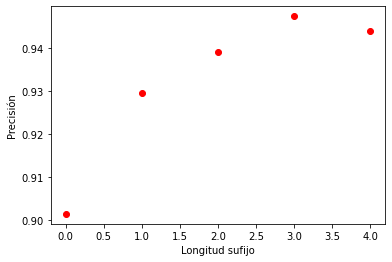

In [6]:
#Representamos los resultados en una grafica
from math import sqrt 
import matplotlib.pyplot as plt
columnas = [0, 1, 2, 3, 4]
intervaloHMM = [] 
print("Prescisión de tnt en función de la longitud de sufijo de AffixTagger")
plt.plot(columnas, precisionMediaSufijos, 'ro')
plt.ylabel('Precisión')
plt.xlabel('Longitud sufijo')
plt.show()